In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_simple
import ariel_gp
import ariel_load
import os
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
kgs.debugging_mode = 1

local


In [2]:
train_data = kgs.load_all_train_data()
train_data = train_data

In [3]:
todo = dict()

model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
todo['Baseline GP ece8'] = model

model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
for ii in range(2):
    model.model.starter_model.loaders[ii].apply_pixel_corrections.mask_hot = False
todo['No mask hot'] = model

model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
for ii in range(2):
    model.model.starter_model.loaders[ii].apply_pixel_corrections.flat_field = False
todo['No flat field'] = model

model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
for ii in range(2):
    model.model.starter_model.loaders[ii].apply_full_sensor_corrections.remove_background_n_rows = 4
todo['4 background rows'] = model

In [4]:
kgs.sanity_checks_active = True
def fname(k):
    return kgs.temp_dir + 'evaluate_model_'+k+'__'+str(len(train_data))+'.pickle'
for k,v in todo.items():
    if not os.path.isfile(fname(k)):
        print(k)
        model = copy.deepcopy(v)
        
        # Precache data
        for d in tqdm(train_data):
            copy.deepcopy(d).load_to_step(5,model.model.starter_model.loaders)
        
        
        model.train(train_data)
        inferred_data = model.infer(train_data)
        print(k)
        kgs.score_metric(inferred_data, train_data)
        kgs.dill_save(fname(k), (inferred_data,model,kgs.git_commit_id))
    else:
        print(k)
        (inferred_data,model,_) = kgs.dill_load(fname(k))
        kgs.score_metric(inferred_data, train_data)

Baseline GP ece8


Processing in parallel: 100%|█████████████████████████████████████████████████████| 1099/1099 [1:38:16<00:00,  5.37s/it]


local
SpawnPoolWorker-1 1
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-2 2
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-3 3
CUDA_VISIBLE_DEVICES= 0
Opt time 669.7989220619202
Baseline GP ece8
Score:          0.6053
RMS error FGS:  211.91 ppm
RMS error AIRS: 163.05 ppm
No mask hot


Processing in parallel: 100%|█████████████████████████████████████████████████████| 1099/1099 [1:38:17<00:00,  5.37s/it]


local
SpawnPoolWorker-4 4
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-5 5
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-6 6
CUDA_VISIBLE_DEVICES= 0
Opt time 653.5487411022186
No mask hot
Score:          0.6051
RMS error FGS:  212.06 ppm
RMS error AIRS: 162.74 ppm
No flat field


Processing in parallel: 100%|█████████████████████████████████████████████████████| 1099/1099 [1:38:31<00:00,  5.38s/it]


local
SpawnPoolWorker-8 8
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-9 9
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-7 7
CUDA_VISIBLE_DEVICES= 0
Opt time 245.78912353515625
No flat field
Score:          0.6056
RMS error FGS:  211.82 ppm
RMS error AIRS: 157.68 ppm
4 background rows


Processing in parallel: 100%|█████████████████████████████████████████████████████| 1099/1099 [1:38:40<00:00,  5.39s/it]


local
SpawnPoolWorker-10 10
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-11 11
CUDA_VISIBLE_DEVICES= 0
local
SpawnPoolWorker-12 12
CUDA_VISIBLE_DEVICES= 0
Opt time 701.3605222702026
4 background rows
Score:          0.6048
RMS error FGS:  211.20 ppm
RMS error AIRS: 159.30 ppm


Baseline GP ece8
[1.0005726661239256, 0.9982837142219477]
[-1.969758715764868e-06, 6.585139985208731e-06]
[1.4784126865415688, 1.346457870875012]
Score:          0.6053
RMS error FGS:  211.91 ppm
RMS error AIRS: 163.05 ppm

20
Score:          0.6239
RMS error FGS:  112.63 ppm
RMS error AIRS: 70.27 ppm

No fudge
Score:          0.5894
RMS error FGS:  211.91 ppm
RMS error AIRS: 163.05 ppm


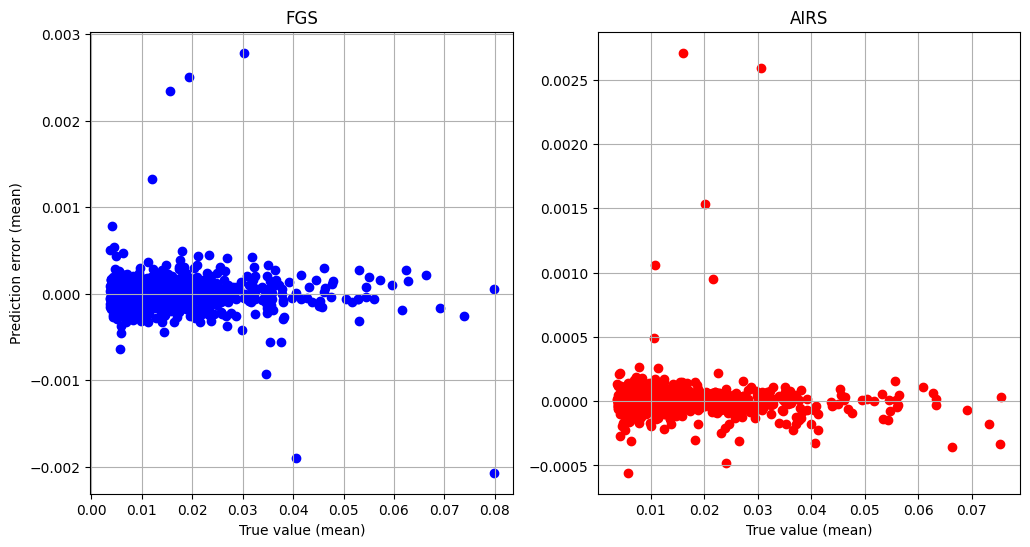

FGS
1349926825, ratio:16.681, x:1.241e-04, y:-2.070e-03, RMS:1.043e-03
3786449677, ratio:14.258, x:1.329e-04, y:-1.895e-03, RMS:5.601e-04
2554492145, ratio:8.762, x:1.517e-04, y:1.329e-03, RMS:1.072e-03
1267010874, ratio:8.756, x:1.059e-04, y:-9.275e-04, RMS:3.319e-04
94572221, ratio:8.366, x:7.630e-05, y:-6.383e-04, RMS:5.569e-04
AIRS
94572221, ratio:12.666, x:4.393e-05, y:-5.565e-04, RMS:5.569e-04
2270815333, ratio:11.306, x:4.230e-05, y:-4.782e-04, RMS:1.045e-03
3649218579, ratio:10.714, x:2.421e-04, y:2.594e-03, RMS:2.596e-03
2554492145, ratio:10.567, x:1.003e-04, y:1.060e-03, RMS:1.072e-03
576917580, ratio:8.341, x:1.842e-04, y:1.536e-03, RMS:1.543e-03


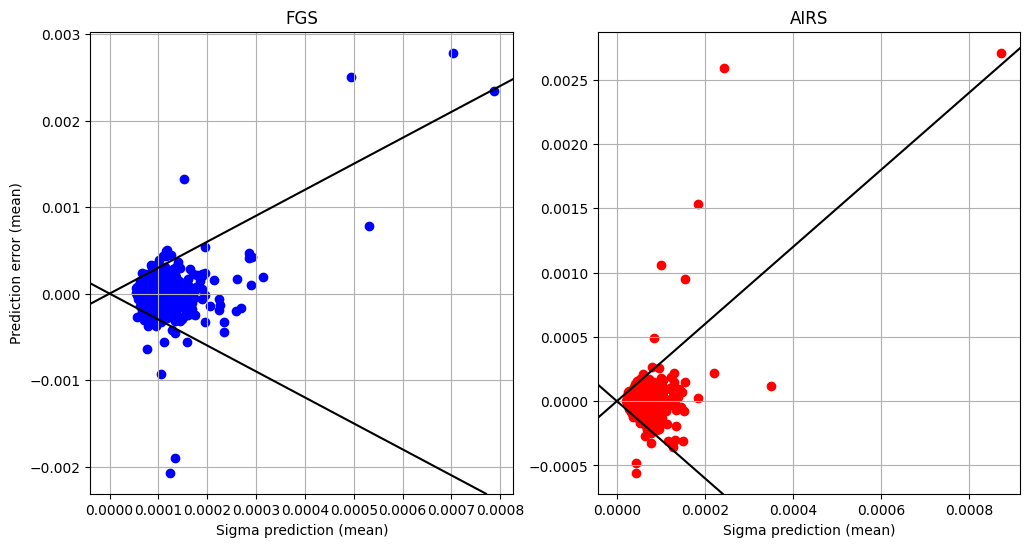

AIRS variation
2270815333, ratio:10.772, x:8.648e-05, y:9.316e-04, RMS:1.045e-03
1349926825, ratio:10.409, x:9.826e-05, y:1.023e-03, RMS:1.043e-03
2740910036, ratio:5.360, x:1.559e-05, y:8.356e-05, RMS:8.349e-05
926530491, ratio:4.407, x:1.594e-05, y:7.024e-05, RMS:9.907e-05
3786449677, ratio:4.207, x:1.048e-04, y:4.411e-04, RMS:5.601e-04


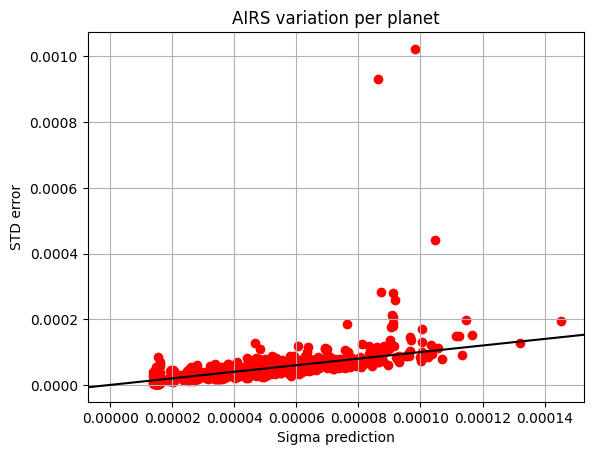

No mask hot
[1.00055540393795, 0.9982810492696721]
[-1.705741591230554e-06, 6.555260590364812e-06]
[1.4799844834924283, 1.3524300455912244]
Score:          0.6051
RMS error FGS:  212.06 ppm
RMS error AIRS: 162.74 ppm

20
Score:          0.6245
RMS error FGS:  112.39 ppm
RMS error AIRS: 70.03 ppm

No fudge
Score:          0.5888
RMS error FGS:  212.06 ppm
RMS error AIRS: 162.74 ppm


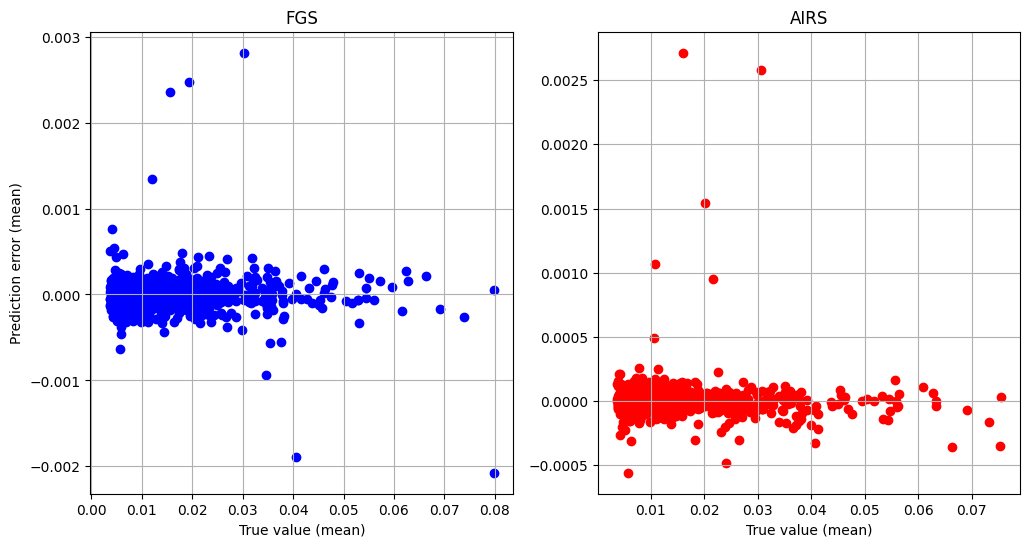

FGS
1349926825, ratio:16.715, x:1.241e-04, y:-2.074e-03, RMS:1.042e-03
3786449677, ratio:14.186, x:1.333e-04, y:-1.891e-03, RMS:5.638e-04
2554492145, ratio:8.894, x:1.504e-04, y:1.338e-03, RMS:1.077e-03
1267010874, ratio:8.808, x:1.060e-04, y:-9.335e-04, RMS:3.326e-04
94572221, ratio:8.376, x:7.629e-05, y:-6.390e-04, RMS:5.578e-04
AIRS
94572221, ratio:13.228, x:4.213e-05, y:-5.573e-04, RMS:5.578e-04
2270815333, ratio:11.015, x:4.381e-05, y:-4.826e-04, RMS:1.048e-03
2554492145, ratio:10.949, x:9.732e-05, y:1.066e-03, RMS:1.077e-03
3649218579, ratio:10.696, x:2.412e-04, y:2.580e-03, RMS:2.582e-03
576917580, ratio:8.856, x:1.740e-04, y:1.541e-03, RMS:1.547e-03


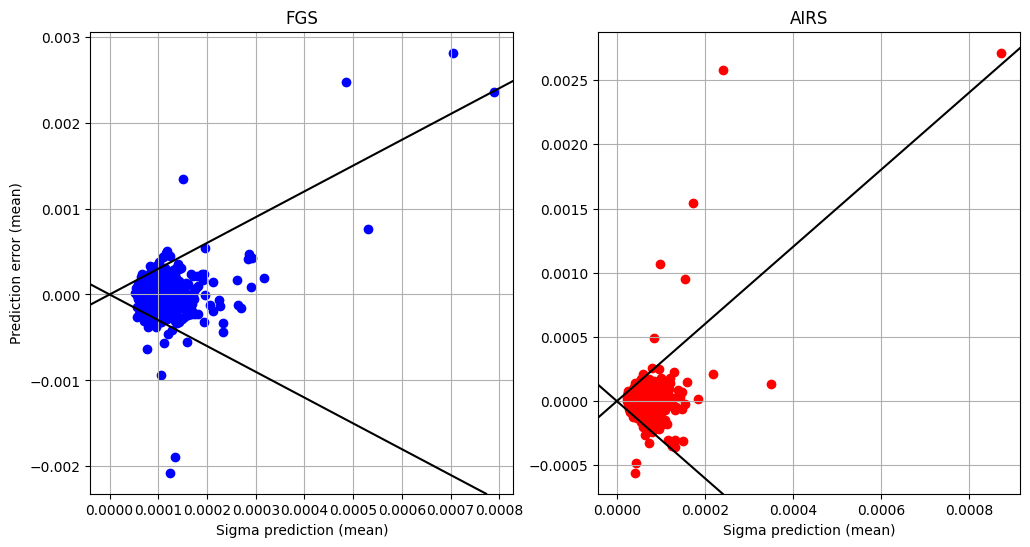

AIRS variation
1349926825, ratio:10.719, x:9.558e-05, y:1.025e-03, RMS:1.042e-03
2270815333, ratio:10.468, x:8.908e-05, y:9.325e-04, RMS:1.048e-03
2740910036, ratio:5.394, x:1.554e-05, y:8.381e-05, RMS:8.393e-05
1345089302, ratio:4.528, x:1.479e-05, y:6.698e-05, RMS:8.102e-05
926530491, ratio:4.402, x:1.594e-05, y:7.017e-05, RMS:1.026e-04


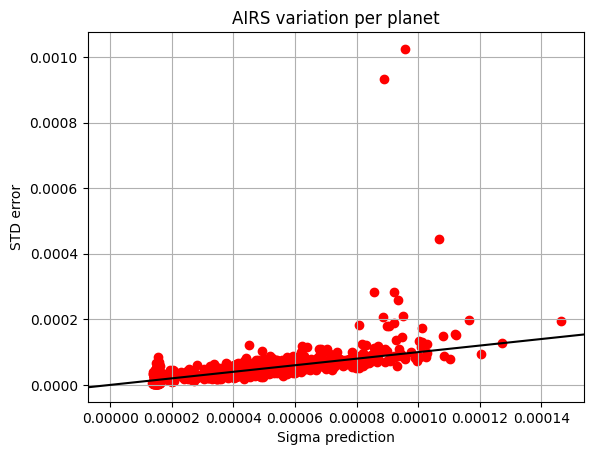

No flat field
[1.0005343284735229, 0.9983271553340596]
[-1.3307339261514705e-06, 6.305814140825586e-06]
[1.517407537184608, 1.338112800164897]
Score:          0.6056
RMS error FGS:  211.82 ppm
RMS error AIRS: 157.68 ppm

20
Score:          0.6243
RMS error FGS:  115.78 ppm
RMS error AIRS: 69.86 ppm

No fudge
Score:          0.5897
RMS error FGS:  211.82 ppm
RMS error AIRS: 157.68 ppm


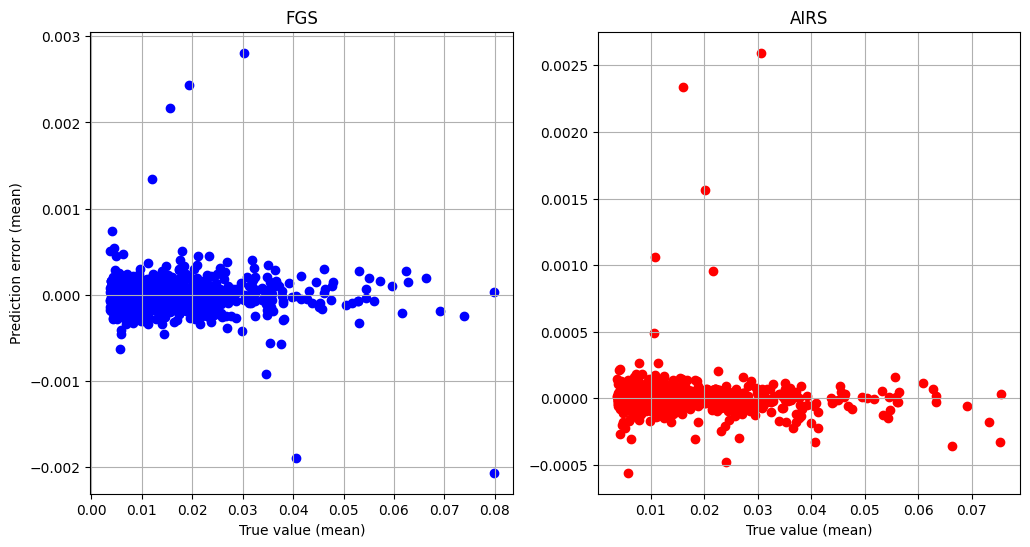

FGS
1349926825, ratio:16.650, x:1.239e-04, y:-2.063e-03, RMS:1.043e-03
3786449677, ratio:14.225, x:1.327e-04, y:-1.888e-03, RMS:5.605e-04
2554492145, ratio:8.943, x:1.508e-04, y:1.349e-03, RMS:1.076e-03
1267010874, ratio:8.727, x:1.059e-04, y:-9.239e-04, RMS:3.326e-04
94572221, ratio:8.262, x:7.639e-05, y:-6.311e-04, RMS:5.584e-04
AIRS
94572221, ratio:12.599, x:4.429e-05, y:-5.581e-04, RMS:5.584e-04
2270815333, ratio:11.236, x:4.251e-05, y:-4.776e-04, RMS:1.046e-03
3649218579, ratio:10.710, x:2.423e-04, y:2.595e-03, RMS:2.597e-03
2554492145, ratio:9.602, x:1.109e-04, y:1.065e-03, RMS:1.076e-03
576917580, ratio:7.822, x:1.999e-04, y:1.564e-03, RMS:1.570e-03


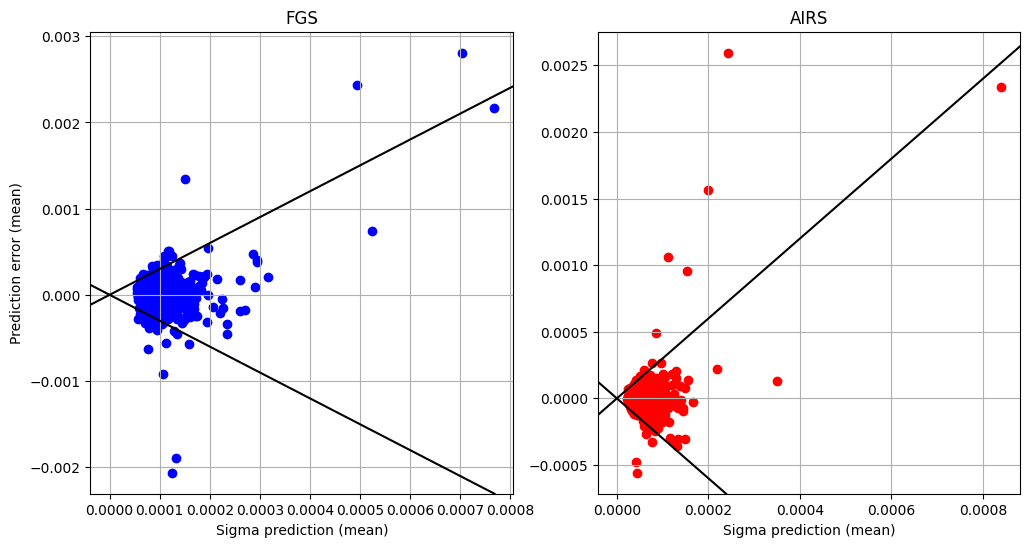

AIRS variation
2270815333, ratio:10.717, x:8.697e-05, y:9.321e-04, RMS:1.046e-03
1349926825, ratio:10.500, x:9.736e-05, y:1.022e-03, RMS:1.043e-03
926530491, ratio:4.407, x:1.594e-05, y:7.024e-05, RMS:1.025e-04
3786449677, ratio:4.215, x:1.048e-04, y:4.418e-04, RMS:5.605e-04
1843015807, ratio:4.046, x:1.603e-05, y:6.484e-05, RMS:2.338e-03


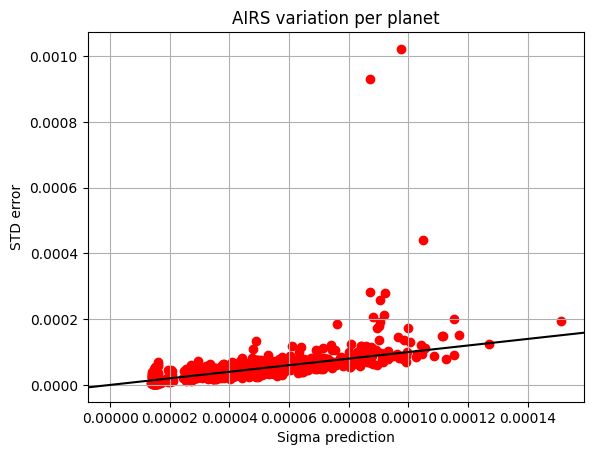

4 background rows
[1.0005552392207377, 0.9982210062569382]
[-1.7306558603846353e-06, 7.230041338075227e-06]
[1.4838052372593302, 1.3340672630375505]
Score:          0.6048
RMS error FGS:  211.20 ppm
RMS error AIRS: 159.30 ppm

20
Score:          0.6252
RMS error FGS:  115.16 ppm
RMS error AIRS: 68.10 ppm

No fudge
Score:          0.5897
RMS error FGS:  211.20 ppm
RMS error AIRS: 159.30 ppm


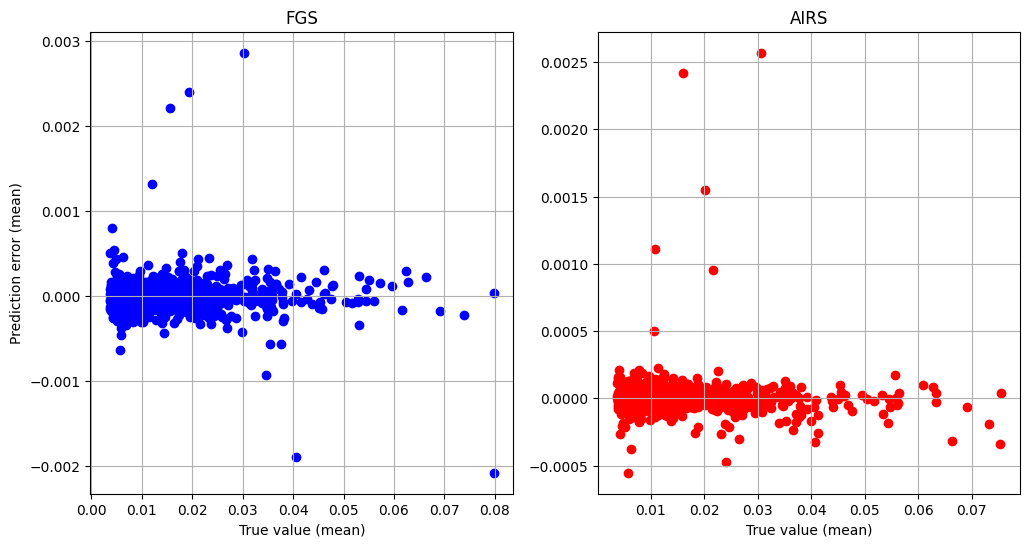

FGS
1349926825, ratio:16.710, x:1.247e-04, y:-2.084e-03, RMS:1.050e-03
3786449677, ratio:14.238, x:1.331e-04, y:-1.895e-03, RMS:5.897e-04
1267010874, ratio:8.779, x:1.062e-04, y:-9.325e-04, RMS:3.477e-04
2554492145, ratio:8.728, x:1.515e-04, y:1.322e-03, RMS:1.121e-03
94572221, ratio:8.485, x:7.524e-05, y:-6.384e-04, RMS:5.539e-04
AIRS
94572221, ratio:12.295, x:4.502e-05, y:-5.535e-04, RMS:5.539e-04
2270815333, ratio:11.190, x:4.217e-05, y:-4.719e-04, RMS:1.045e-03
2554492145, ratio:10.458, x:1.060e-04, y:1.109e-03, RMS:1.121e-03
3649218579, ratio:10.430, x:2.463e-04, y:2.569e-03, RMS:2.571e-03
576917580, ratio:7.858, x:1.969e-04, y:1.548e-03, RMS:1.553e-03


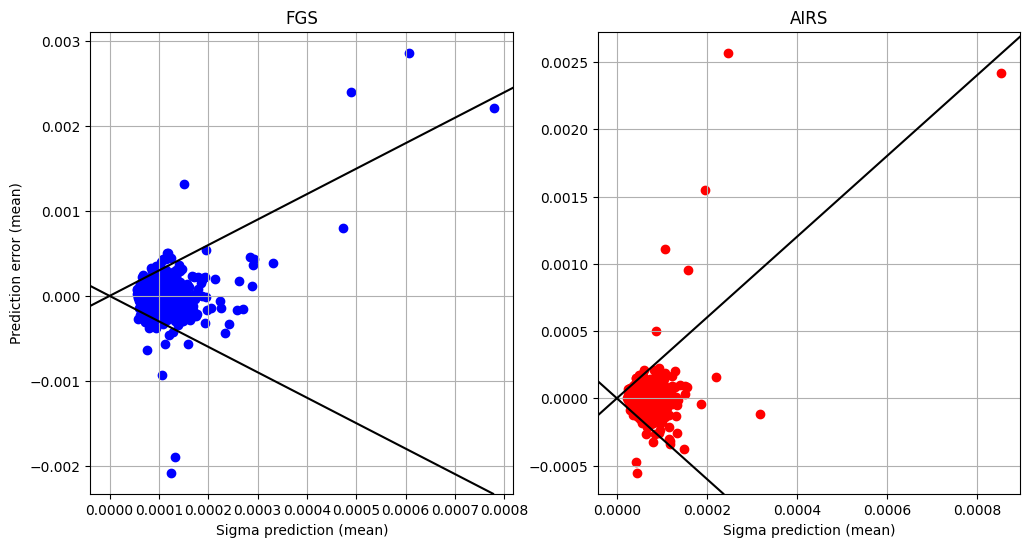

AIRS variation
1349926825, ratio:10.544, x:9.741e-05, y:1.027e-03, RMS:1.050e-03
2270815333, ratio:10.318, x:9.060e-05, y:9.349e-04, RMS:1.045e-03
926530491, ratio:4.435, x:1.595e-05, y:7.075e-05, RMS:1.164e-04
3786449677, ratio:4.159, x:1.150e-04, y:4.784e-04, RMS:5.897e-04
1843015807, ratio:4.057, x:1.603e-05, y:6.505e-05, RMS:2.420e-03


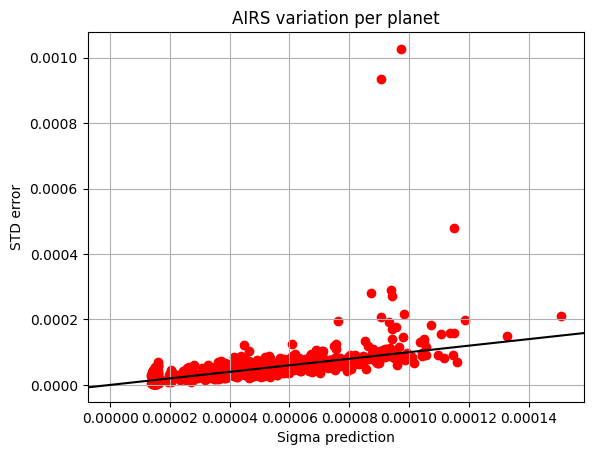

In [5]:
def basics():
    plt.grid(True)
    plt.box(True)
def plot_two_sensors(func, xl, yl, mod):
    _,ax = plt.subplots(1,2,figsize=(12,6))
    plt.sca(ax[0]);basics()
    plt.title('FGS')
    plt.xlabel(xl)
    plt.ylabel(yl)
    func(slice(0,1), 'blue', 'FGS')
    mod()
    
    plt.sca(ax[1]);basics()
    plt.title('AIRS')
    plt.xlabel(xl)
    func(slice(1,283), 'red', 'AIRS')
    mod()
    
    plt.pause(0.001)

def report_extreme_ratios(x,y,name):
    print(name)
    inds = np.argsort(np.abs(y/x))[::-1]
    for ii in inds[:5]:
        print(f'{inferred_data[ii].planet_id}, ratio:{np.abs(y[ii]/x[ii]):.3f}, x:{x[ii]:.3e}, y:{y[ii]:.3e}, RMS:{kgs.rms(error_matrix[ii,:]):.3e}')
    
    
for k,v in todo.items():
    (inferred_data,model,_) = kgs.dill_load(fname(k))
    #model.bias_a[0]+=0.006
    #model.bias_a[1]-=0.0002
    #inferred_data = model.infer(train_data)
    print(k)
    print(model.bias_a)
    print(model.bias_b)
    print(model.sigma_fudge)
    kgs.score_metric(inferred_data, train_data)
    print('')
    print('20')
    kgs.score_metric(inferred_data[:20], train_data[:20]) 
    print('')
    print('No fudge')
    model.sigma_fudge = [1,1]
    #model.bias_a = [1,1]
    #model.bias_b = [0,0]
    # print('!!!')
    inferred_data = model.infer(train_data)
    kgs.score_metric(inferred_data, train_data)     
    error_matrix = np.array([d.spectrum - t.spectrum for d,t in zip(inferred_data,train_data)])
    true_matrix = np.array([t.spectrum for d,t in zip(inferred_data,train_data)])
    
    def plot_prediction_vs_true(slic, col, name):
        x = np.mean(true_matrix[:,slic],1)
        y = np.mean(error_matrix[:,slic],1)
        plt.scatter(x,y,color = col)
        
    plot_two_sensors(plot_prediction_vs_true, 'True value (mean)', 'Prediction error (mean)', lambda:0)
    
    def plot_mean_error_vs_sigma(slic,col, name):
        x = [np.sqrt(np.sum(d.spectrum_cov[slic,slic])/(slic.stop-slic.start)**2) for d in inferred_data]
        y = np.mean(error_matrix[:,slic],1)
        plt.scatter(x,y,color = col)
        report_extreme_ratios(x,y,name)
    def mod():
        plt.axline((0,0), slope=3, color='black')
        plt.axline((0,0), slope=-3, color = 'black')        
    plot_two_sensors(plot_mean_error_vs_sigma, 'Sigma prediction (mean)', 'Prediction error (mean)', mod)
    
    plt.figure(); basics()
    plt.title('AIRS variation per planet')
    plt.xlabel('Sigma prediction')
    plt.ylabel('STD error')
    n=282
    x=np.sqrt([(np.trace(d.spectrum_cov[1:,1:]) - np.sum(d.spectrum_cov[1:,1:]) / n) / n for d in inferred_data])
    y=np.sqrt(np.var(error_matrix[:,1:],1))
    plt.scatter(x, y, color='red')
    plt.axline((0,0), slope=1, color='black')
    report_extreme_ratios(x,y,'AIRS variation')    
    plt.pause(0.001)

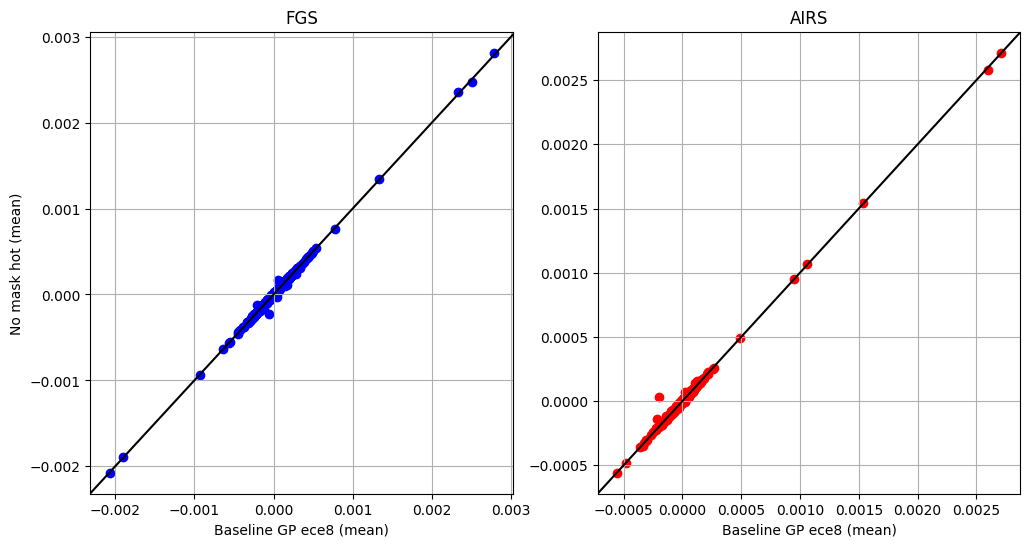

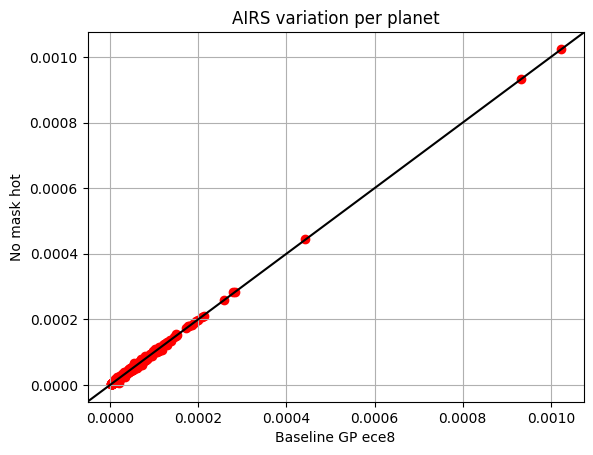

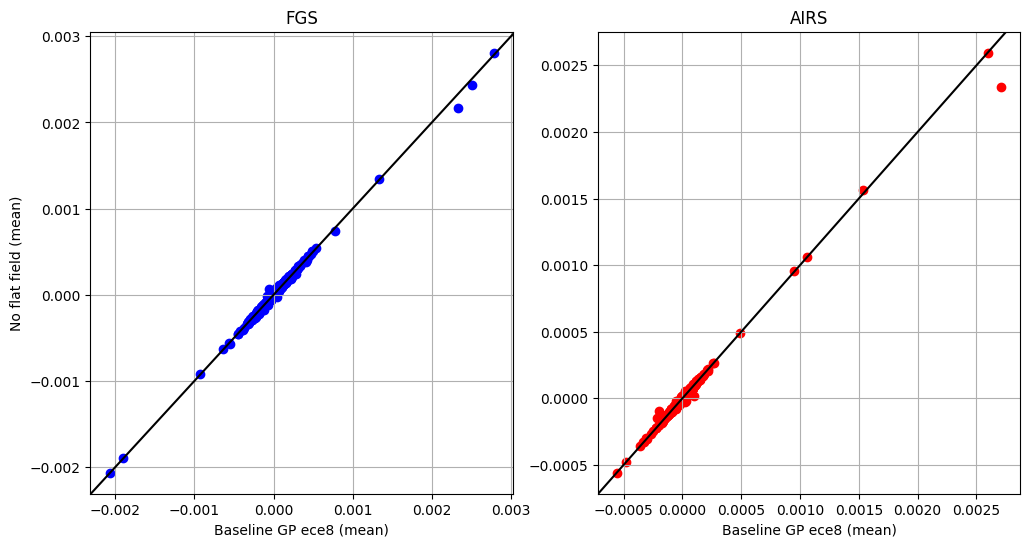

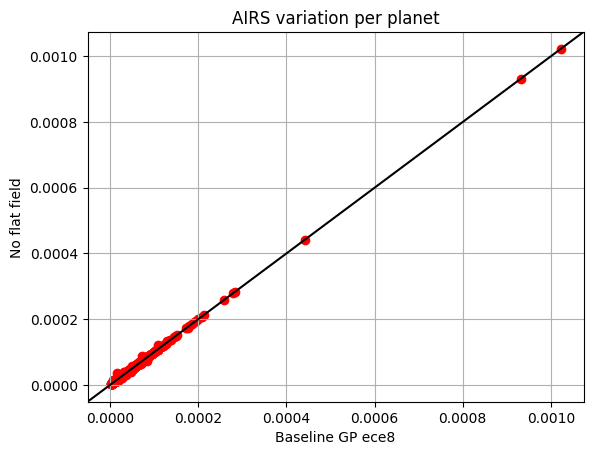

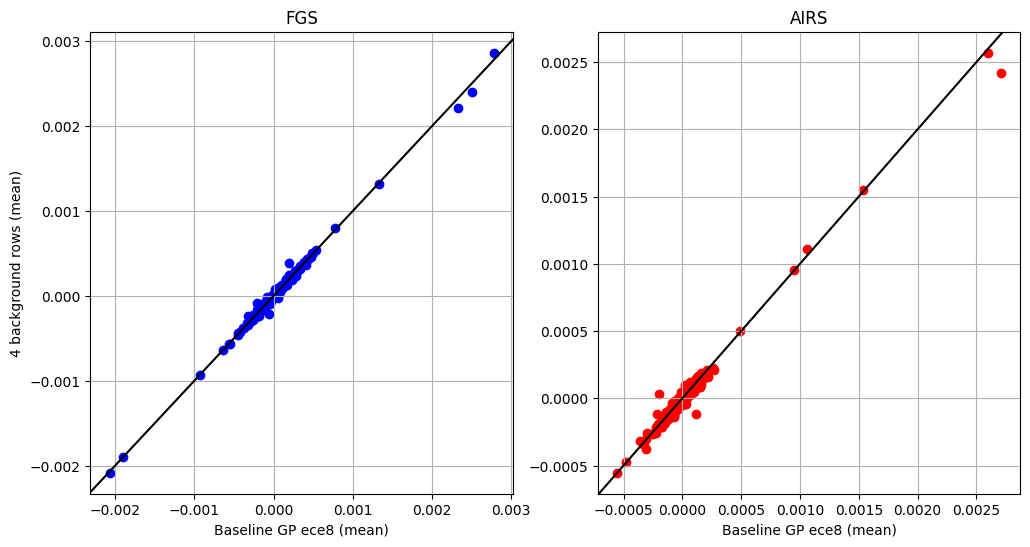

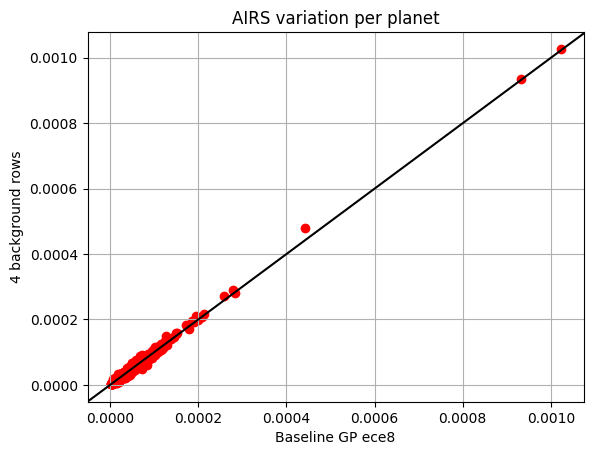

In [6]:
compare1= list(todo.keys())[0]
data1 = kgs.dill_load(fname(compare1))[0]
for k,v in todo.items():    
    compare2= k
    if compare2==compare1:
        continue    
    data2 = kgs.dill_load(fname(compare2))[0]
    error1 = np.array([d.spectrum - t.spectrum for d,t in zip(data1,train_data)])
    error2 = np.array([d.spectrum - t.spectrum for d,t in zip(data2,train_data)])
    def plot_prediction_vs_true(slic, col, name):
        x = np.mean(error1[:,slic],1)
        y = np.mean(error2[:,slic],1)
        plt.scatter(x,y,color = col)

    plot_two_sensors(plot_prediction_vs_true, compare1+' (mean)', compare2+' (mean)', lambda:plt.axline((0,0),slope=1,color='black'))

    plt.figure(); basics()
    plt.title('AIRS variation per planet')
    plt.xlabel(compare1)
    plt.ylabel(compare2)
    x=np.sqrt(np.var(error1[:,1:],1))
    y=np.sqrt(np.var(error2[:,1:],1))
    plt.scatter(x, y, color='red')
    plt.axline((0,0), slope=1, color='black')
    plt.pause(0.001)

In [7]:
# import subprocess

# # Hibernate Windows
# subprocess.run(
#     ["/mnt/c/Windows/System32/shutdown.exe", "/h"],  # add "/f" to force-close apps
#     check=True
# )